In [1]:
pip install yfinance

In [2]:
pip install streamlit

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import pandas_datareader.data as reader
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential
from fbprophet import Prophet

In [4]:
# Setting inicial

crypro_currency=input("Enter the Currency :")
against_currency=input("Which Currecy Do you want to use for reference : ")

x=crypro_currency+"-"+against_currency
print(x)
type(x)

Enter the Currency :btc
Which Currecy Do you want to use for reference : inr
btc-inr


str

In [5]:
start=dt.datetime(2016,1,1)
end=dt.datetime.now()
data = yf.download(x,start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
# How The Data Looks
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,28513.429688,28864.216797,28273.705078,28763.769531,28763.769531,2402570153
2016-01-02,28782.841797,28878.207031,28600.589844,28704.431641,28704.431641,1993147335
2016-01-03,28713.703125,28724.630859,28096.636719,28467.287109,28467.287109,2623809084
2016-01-04,28470.597656,28897.769531,28404.460938,28842.994141,28842.994141,2562524545
2016-01-05,28841.529297,28875.925781,28606.195312,28734.496094,28734.496094,2296484779


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2302 entries, 2016-01-01 to 2022-04-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2302 non-null   float64
 1   High       2302 non-null   float64
 2   Low        2302 non-null   float64
 3   Close      2302 non-null   float64
 4   Adj Close  2302 non-null   float64
 5   Volume     2302 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.9 KB


In [8]:
model=Prophet(interval_width=0.95, daily_seasonality=True)
df=data.reset_index()
df
df[['ds','y']]=df[['Date','Adj Close']]
model.fit(df)

Initial log joint probability = -44.4486


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4315.74     0.0464369       603.226           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4413.17    0.00225545       959.845     0.04877       0.601      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4461.12    0.00720443       191.943           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4485.03    0.00143233       127.416           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4537.9    0.00521432       286.536           1           1      611   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2016-01-01,2.851343e+04,2.886422e+04,2.827371e+04,2.876377e+04,2.876377e+04,2402570153,2016-01-01,2.876377e+04
1,2016-01-02,2.878284e+04,2.887821e+04,2.860059e+04,2.870443e+04,2.870443e+04,1993147335,2016-01-02,2.870443e+04
2,2016-01-03,2.871370e+04,2.872463e+04,2.809664e+04,2.846729e+04,2.846729e+04,2623809084,2016-01-03,2.846729e+04
3,2016-01-04,2.847060e+04,2.889777e+04,2.840446e+04,2.884299e+04,2.884299e+04,2562524545,2016-01-04,2.884299e+04
4,2016-01-05,2.884153e+04,2.887593e+04,2.860620e+04,2.873450e+04,2.873450e+04,2296484779,2016-01-05,2.873450e+04
...,...,...,...,...,...,...,...,...,...
2297,2022-04-16,3.095423e+06,3.101634e+06,3.059250e+06,3.085666e+06,3.085666e+06,1284901325445,2022-04-16,3.085666e+06
2298,2022-04-17,3.085154e+06,3.096828e+06,3.024328e+06,3.031661e+06,3.031661e+06,1456990562888,2022-04-17,3.031661e+06
2299,2022-04-18,3.031985e+06,3.126326e+06,2.954799e+06,3.114242e+06,3.114242e+06,2571046354667,2022-04-18,3.114242e+06
2300,2022-04-19,3.114392e+06,3.186282e+06,3.098897e+06,3.172704e+06,3.172704e+06,1934319995647,2022-04-19,3.172704e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2302 non-null   datetime64[ns]
 1   Open       2302 non-null   float64       
 2   High       2302 non-null   float64       
 3   Low        2302 non-null   float64       
 4   Close      2302 non-null   float64       
 5   Adj Close  2302 non-null   float64       
 6   Volume     2302 non-null   int64         
 7   ds         2302 non-null   datetime64[ns]
 8   y          2302 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 162.0 KB


In [11]:
future=model.make_future_dataframe(periods=100,freq='D')

In [12]:
forecast=model.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,25679.886540,-679389.997133,647040.990850,25679.886540,25679.886540,-36445.151882,-36445.151882,-36445.151882,-10539.767524,...,-346.004074,-346.004074,-346.004074,-25559.380284,-25559.380284,-25559.380284,0.0,0.0,0.0,-10765.265342
1,2016-01-02,25809.419474,-703939.825120,637580.911855,25809.419474,25809.419474,-33548.539399,-33548.539399,-33548.539399,-10539.767524,...,740.642105,740.642105,740.642105,-23749.413980,-23749.413980,-23749.413980,0.0,0.0,0.0,-7739.119925
2,2016-01-03,25938.952408,-651654.379159,659737.715971,25938.952408,25938.952408,-34432.906840,-34432.906840,-34432.906840,-10539.767524,...,-899.069562,-899.069562,-899.069562,-22994.069754,-22994.069754,-22994.069754,0.0,0.0,0.0,-8493.954432
3,2016-01-04,26068.485341,-654075.703501,674376.892194,26068.485341,26068.485341,-33098.490648,-33098.490648,-33098.490648,-10539.767524,...,815.046671,815.046671,815.046671,-23373.769795,-23373.769795,-23373.769795,0.0,0.0,0.0,-7030.005307
4,2016-01-05,26198.018275,-742713.069220,660793.026679,26198.018275,26198.018275,-36021.602088,-36021.602088,-36021.602088,-10539.767524,...,-536.026078,-536.026078,-536.026078,-24945.808486,-24945.808486,-24945.808486,0.0,0.0,0.0,-9823.583813


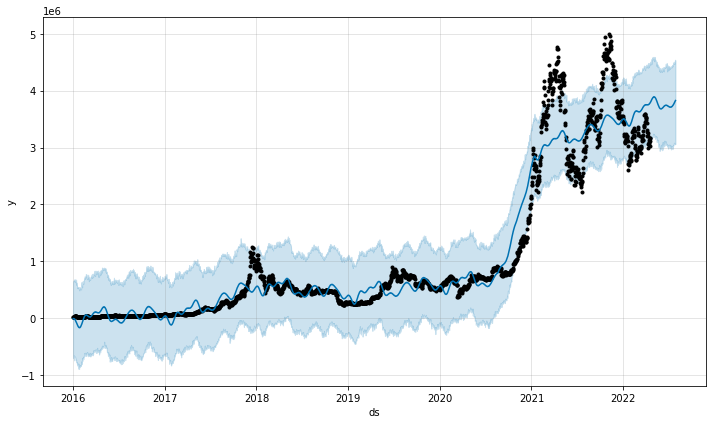

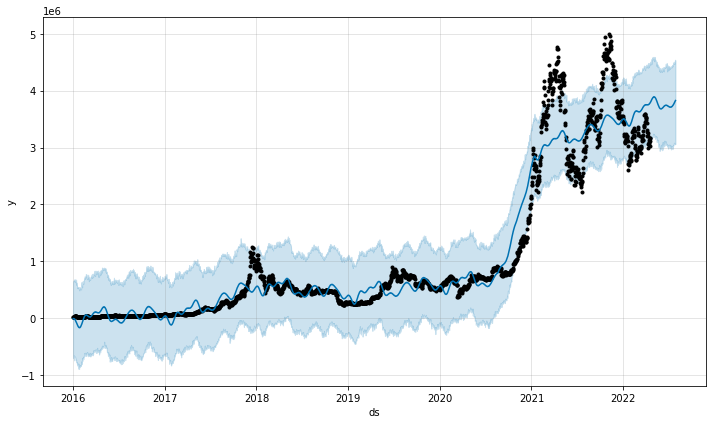

In [14]:
model.plot(forecast)

In [15]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2397,2022-07-25,3.869353e+06,2.991984e+06,4.534725e+06,3.551252e+06,4.148508e+06,-78531.256652,-78531.256652,-78531.256652,-10539.767524,...,815.046671,815.046671,815.046671,-68806.535799,-68806.535799,-68806.535799,0.0,0.0,0.0,3.790822e+06
2398,2022-07-26,3.870984e+06,3.064992e+06,4.533190e+06,3.546136e+06,4.152859e+06,-72372.828504,-72372.828504,-72372.828504,-10539.767524,...,-536.026078,-536.026078,-536.026078,-61297.034902,-61297.034902,-61297.034902,0.0,0.0,0.0,3.798611e+06
2399,2022-07-27,3.872614e+06,3.092612e+06,4.461577e+06,3.545218e+06,4.157210e+06,-62231.139320,-62231.139320,-62231.139320,-10539.767524,...,1863.847787,1863.847787,1863.847787,-53555.219582,-53555.219582,-53555.219582,0.0,0.0,0.0,3.810383e+06
2400,2022-07-28,3.874245e+06,3.107950e+06,4.569206e+06,3.543285e+06,4.161815e+06,-57808.035835,-57808.035835,-57808.035835,-10539.767524,...,-1638.436849,-1638.436849,-1638.436849,-45629.831461,-45629.831461,-45629.831461,0.0,0.0,0.0,3.816437e+06
2401,2022-07-29,3.875876e+06,3.068071e+06,4.543831e+06,3.540663e+06,4.171029e+06,-48454.818139,-48454.818139,-48454.818139,-10539.767524,...,-346.004074,-346.004074,-346.004074,-37569.046541,-37569.046541,-37569.046541,0.0,0.0,0.0,3.827421e+06


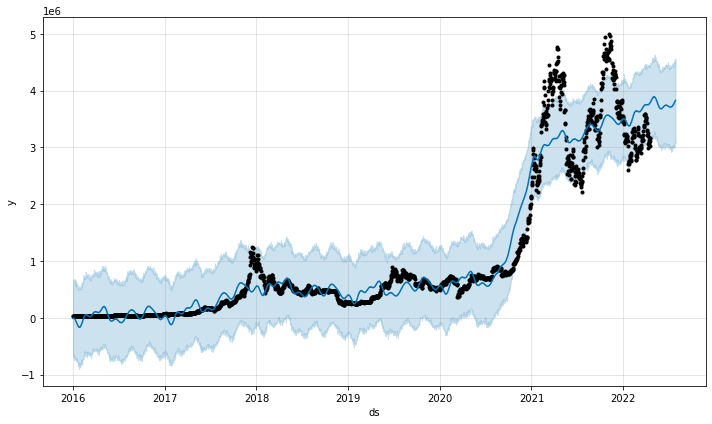

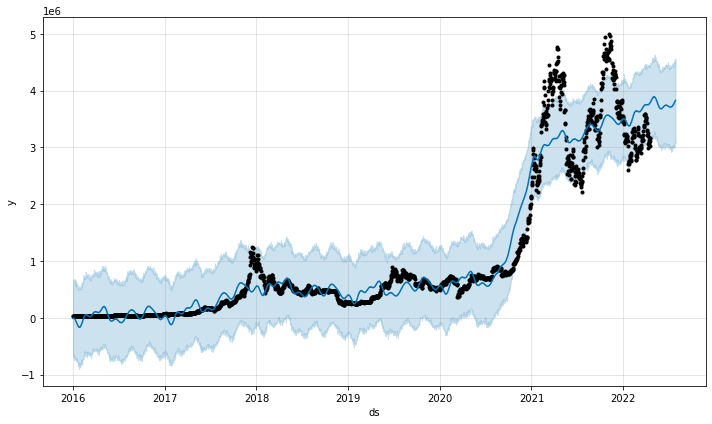

In [16]:
model.plot(forecast)

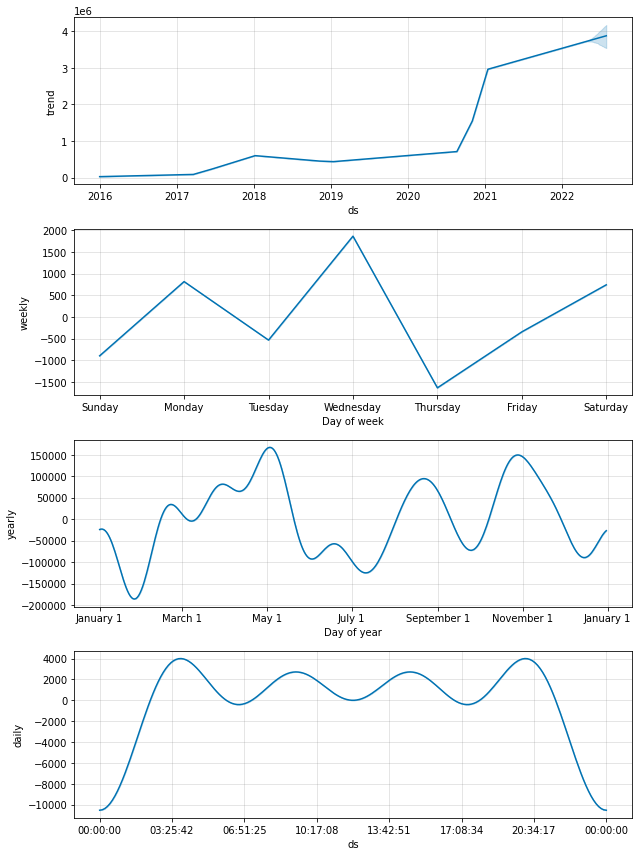

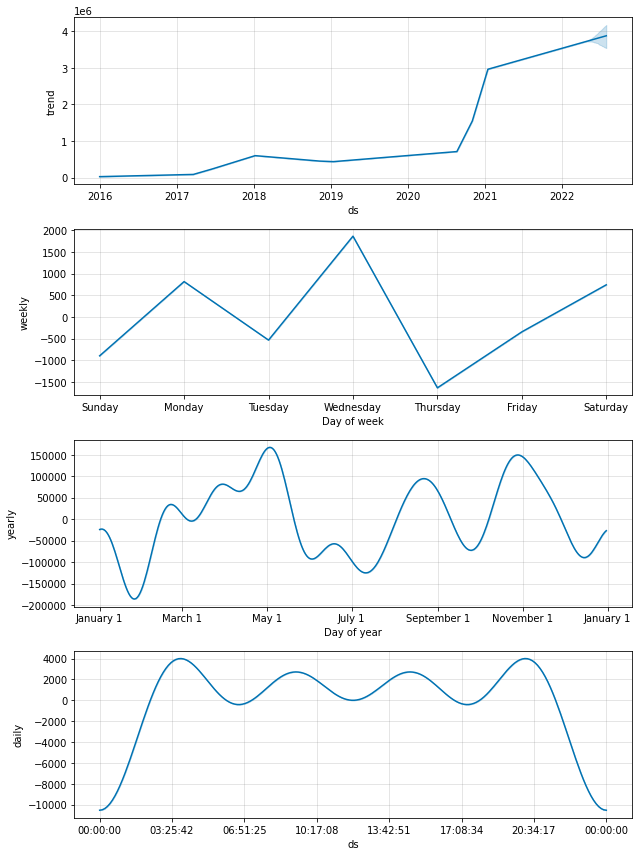

In [17]:
model.plot_components(forecast)

In [18]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1000 days', period='1000 days', horizon = '500 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-12-06 00:00:00 and 2020-12-06 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

Initial log joint probability = -67.914
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3452.65     0.0316384        757.86      0.8346      0.8346      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3581.9    0.00520517       289.586           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3645.6    0.00690773       1465.33      0.5789      0.5789      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3674.47     0.0073717       417.791           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3696.68    0.00232097       143.643           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha   

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-12-07,1.147060e+06,9.877550e+05,1.306189e+06,1416537.000,2020-12-06
1,2020-12-08,1.149682e+06,9.836052e+05,1.306222e+06,1350741.875,2020-12-06
2,2020-12-09,1.152792e+06,1.000415e+06,1.311337e+06,1369604.500,2020-12-06
3,2020-12-10,1.154068e+06,9.941519e+05,1.312555e+06,1347820.250,2020-12-06
4,2020-12-11,1.156244e+06,9.955609e+05,1.310900e+06,1331632.875,2020-12-06


In [19]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,50 days,1.261750e+12,1.123277e+06,9.906472e+05,0.429818,0.470158,0.0
1,51 days,1.293426e+12,1.137289e+06,1.010998e+06,0.436851,0.492987,0.0
2,52 days,1.318439e+12,1.148233e+06,1.029702e+06,0.444098,0.511549,0.0
3,53 days,1.354338e+12,1.163760e+06,1.052509e+06,0.452052,0.515190,0.0
4,54 days,1.393872e+12,1.180624e+06,1.077019e+06,0.460522,0.518991,0.0


In [20]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,50 days,1.261750e+12,1.123277e+06,9.906472e+05,0.429818,0.470158,0.0
1,51 days,1.293426e+12,1.137289e+06,1.010998e+06,0.436851,0.492987,0.0
2,52 days,1.318439e+12,1.148233e+06,1.029702e+06,0.444098,0.511549,0.0
3,53 days,1.354338e+12,1.163760e+06,1.052509e+06,0.452052,0.515190,0.0
4,54 days,1.393872e+12,1.180624e+06,1.077019e+06,0.460522,0.518991,0.0


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


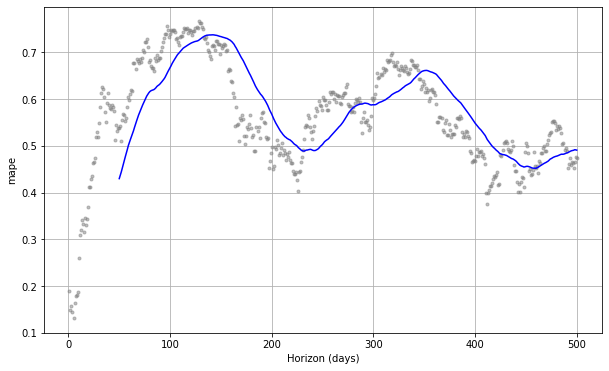

In [21]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')